# Pyber Ride Sharing

***

### Analysis

# Bubble Plot of Ride Sharing Data

/Users/mcopple/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


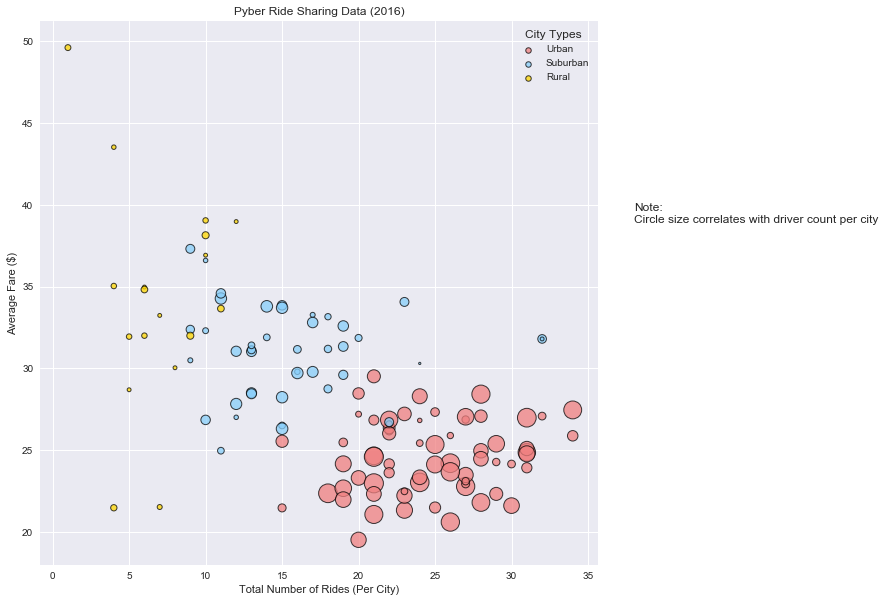

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


city_input_file = 'raw_data/city_data.csv'
ride_input_file = 'raw_data/ride_data.csv'

city_df = pd.read_csv(city_input_file)
ride_df = pd.read_csv(ride_input_file)

#make copies of data so we can use originals for troubleshooting
city_data_df = city_df.copy()

ride_data_df = ride_df.copy()

#group ride data by city
city_level_ride_data = ride_data_df.groupby(ride_data_df['city'])

#get average fare per city
city_level_avg_fare = city_level_ride_data.mean().reset_index()

# get number of rides per city
city_level_nbr_rides = city_level_ride_data.count().reset_index()

#merge average fare data into city dataframe
city_data_with_avg_fare = pd.merge(city_data_df, city_level_avg_fare, on='city', how='left')

#rename columns for easier reference
city_data_with_avg_fare_renamed = city_data_with_avg_fare.rename(columns={"fare": "average_fare"})

#reorganize data set
city_data_with_avg_fare_work = city_data_with_avg_fare_renamed[['city', 'driver_count', 'type', 'average_fare']]

#merge average fare and ride tables
city_data_with_nbr_rides = pd.merge(city_data_with_avg_fare_work, city_level_nbr_rides, on='city', how='left')

#rename columns for clarity
city_data_with_nbr_rides_renamed = city_data_with_nbr_rides.rename(columns={"ride_id": "nbr_rides"})

#reorganize data set
city_data_work = city_data_with_nbr_rides_renamed[['city', 'driver_count', 'type', 'average_fare', 'nbr_rides']]

#build data set for urban cities
city_data_work_urban = city_data_work.loc[city_data_work['type'] == 'Urban']

#build data set for suburban cities
city_data_work_suburban = city_data_work.loc[city_data_work['type'] == 'Suburban']

#build data set for rural cities
city_data_work_rural = city_data_work.loc[city_data_work['type'] == 'Rural']

#use seaborn default styling
sns.set()
#bubble chart
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

#create scatterplots from dataframes
ax1.scatter(city_data_work_urban['nbr_rides'],city_data_work_urban['average_fare'], 
                        (city_data_work_urban['driver_count']*5),facecolors='lightcoral', edgecolors='black', alpha=0.75,
                        label='Urban',linewidth=1.0)
ax2.scatter(city_data_work_suburban['nbr_rides'],city_data_work_suburban['average_fare'], 
                        (city_data_work_suburban['driver_count']*5),facecolors='lightskyblue', edgecolors='black',
                        alpha=0.75,label='Suburban',linewidth=1.0)
ax3.scatter(city_data_work_rural['nbr_rides'],city_data_work_rural['average_fare'], 
                        (city_data_work_rural['driver_count']*5),facecolors='gold', edgecolors='black',
                        alpha=0.75,label='Rural',linewidth=1.0)

#side annotation, labels and legend
textstr = 'Note:\nCircle size correlates with driver count per city'
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.figtext(.95, .60, textstr)
lgnd = plt.legend(loc='best', title = 'City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
    
#display dataset
plt.show()


# Total Fares by City Type